In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('data_in/labeledTrainData.tsv',delimiter='\t',
                         quoting=3)

In [4]:
print(train_data.head())

         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...


In [5]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB
None


In [7]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

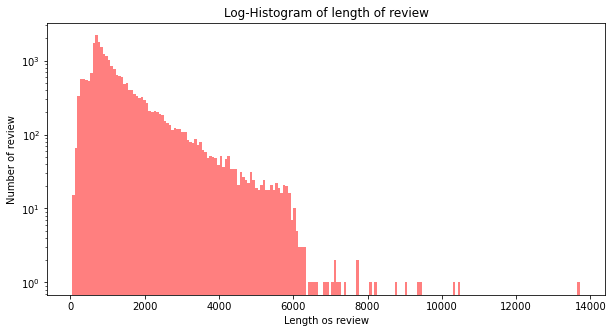

In [9]:
plt.figure(figsize=(10,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='length')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length os review')
plt.ylabel('Number of review')
plt.show()

In [11]:
#수치 데이터 확인
print('리뷰길이 최대값: {}'.format(np.max(train_length)))
print('리뷰길이 최소값: {}'.format(np.min(train_length)))
print('리뷰길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰길이 중간값: {}'.format(np.median(train_length)))
print('리뷰길이 1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰길이 3사분위: {}'.format(np.percentile(train_length,75)))

리뷰길이 최대값: 13710
리뷰길이 최소값: 54
리뷰길이 평균값: 1329.71
리뷰길이 표준편차: 1005.22
리뷰길이 중간값: 983.0
리뷰길이 1사분위: 705.0
리뷰길이 3사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x279e3faf2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x279e3fbe940>,
 'boxes': [<matplotlib.lines.Line2D at 0x279e3fafc40>],
 'medians': [<matplotlib.lines.Line2D at 0x279e3fbebe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x279e3f8b3d0>],
 'means': [<matplotlib.lines.Line2D at 0x279e3fbef40>]}

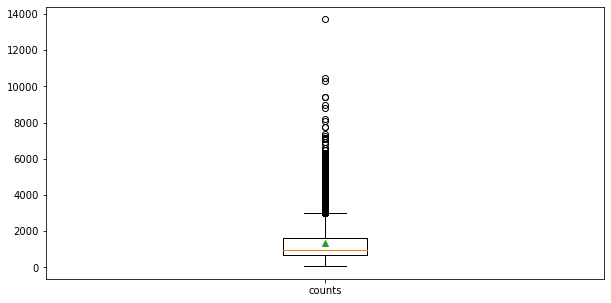

In [12]:
plt.figure(figsize=(10,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

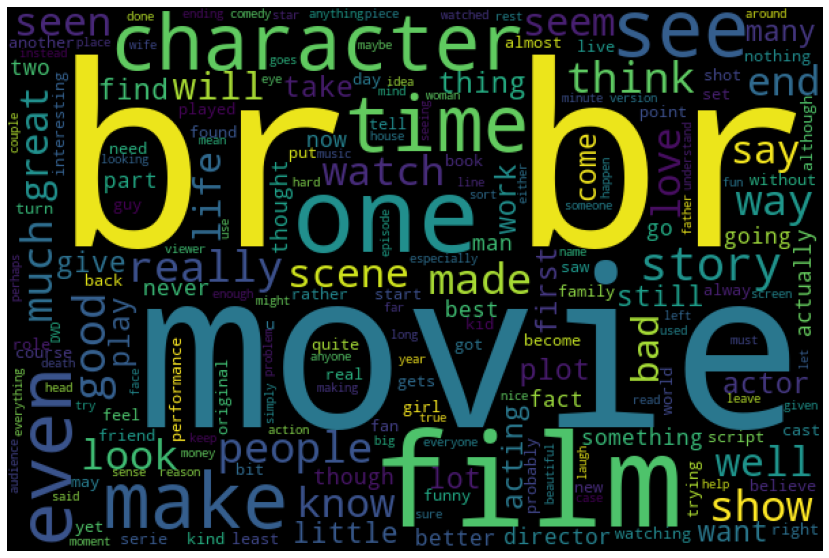

In [13]:
from wordcloud import WordCloud
cloud = WordCloud(width=600, height=400).generate(' '.join(train_data['review']))
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(cloud)

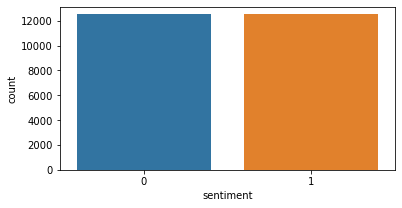

In [14]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(x=train_data['sentiment'])
plt.show()

In [15]:
print('긍정 리뷰 수: {}'.format(train_data['sentiment'].value_counts()[1]))
print('부정 리뷰 수: {}'.format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 수: 12500
부정 리뷰 수: 12500


In [16]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))


In [17]:
print(train_word_counts[0])

433


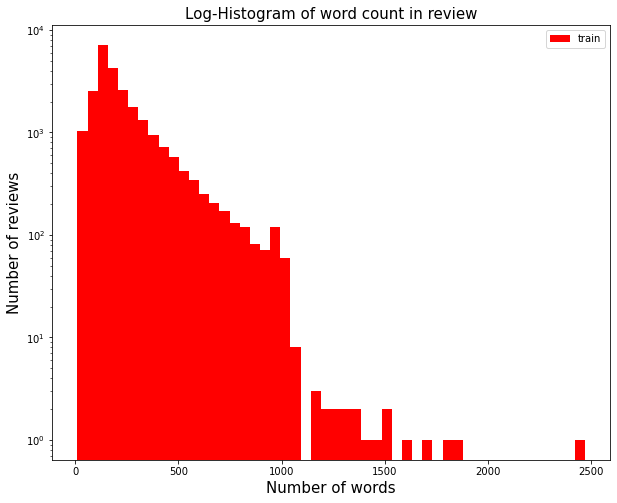

In [19]:
plt.figure(figsize=(10,8))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonpositive='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)
plt.show()

In [21]:
print('리뷰 단어 수 최대값:{}'.format(np.max(train_word_counts)))
print('리뷰 단어 수 최소값:{}'.format(np.min(train_word_counts)))
print('리뷰 단어 수 평균값:{}'.format(np.mean(train_word_counts)))
print('리뷰 단어 수 표준편차:{:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 수 중간값:{}'.format(np.median(train_word_counts)))
print('리뷰 단어 수 1사분위:{}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 수 3사분위:{}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 수 최대값:2470
리뷰 단어 수 최소값:10
리뷰 단어 수 평균값:233.78624
리뷰 단어 수 표준편차:173.74
리뷰 단어 수 중간값:174.0
리뷰 단어 수 1사분위:127.0
리뷰 단어 수 3사분위:284.0


In [22]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x: max(y.isupper() for y in x)))
numbers = np.mean(train_data['review'].apply(lambda x: max(y.isdigit() for y in x)))#숫자가 포함되어있는지

print('물음표가 있는 리뷰: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 리뷰: {:.2f}%'.format(fullstop * 100))
print('첫 글자 대문자 리뷰: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 리뷰: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 리뷰: {:.2f}%'.format(numbers * 100))

물음표가 있는 리뷰: 29.55%
마침표가 있는 리뷰: 99.69%
첫 글자 대문자 리뷰: 0.00%
대문자가 있는 리뷰: 99.59%
숫자가 있는 리뷰: 56.66%


## 데이터 전처리

In [24]:
import re
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [26]:
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [28]:
review = train_data['review'][0]
review_text = BeautifulSoup(review,'lxml').get_text()#태그빼고 텍스트만 가져옴
print(review_text)

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

In [30]:
review_text = re.sub(r"[^A-Za-z]",' ', review_text)#정규 표현식 알파벳을 제외한 나머지 지우기
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [31]:
stop_words = set(stopwords.words('english'))#불용어 가져오기
review_text = review_text.lower()#소문자로 바꿔준다
words = review_text.split()#스페이스로 구분지어 단어리스트로 변환
words = [w for w in words if not w in stop_words] #불용어 제거

In [32]:
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [33]:
#문장으로 만들어야 하므로 다시 붙여준다
clean_review = ' '.join(words)
print(clean_review)#모델의 입력에 사용할 한건의 리뷰 전처리 완료

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [37]:
def preprocessing(review, remove_stopwords=False):
    review_text = BeautifulSoup(review,'lxml').get_text()
    review_text = re.sub(r"[^A=Za-z]", ' ', review_text)
    words = review_text.lower().split()
                         
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [w for w in words if not w in stops]
        clean_review = ' '.join(words)
    else:
        clean_review = ' '.join(words)
                         
    return clean_review

In [38]:
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords=True))
    

In [39]:
print(clean_train_reviews[0])

ith stuff going moment started listening music watching odd documentary watched iz watched oonwalker aybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent oonwalker part biography part feature film remember going see cinema originally released ome subtle messages feeling towards press also obvious message drugs bad kay isually impressive course ichael ackson unless remotely like anyway going hate find boring ome may call egotist consenting making movie fans would say made fans true really nice actual feature film bit finally starts minutes excluding mooth riminal sequence oe esci convincing psychopathic powerful drug lord hy wants dead bad beyond ecause overheard plans ah oe esci character ranted wanted people know supplying drugs etc dunno maybe hates music ots cool things like turning car robot whole peed emon sequence also director must patience saint came filming kiddy ad sequence usually directors hate working one kid let alone whol

In [40]:
clean_train_df = pd.DataFrame({'review': clean_train_reviews,
                              'entiment': train_data['sentiment']})

In [43]:
tokenizer = Tokenizer()#객체 생성
tokenizer.fit_on_texts(clean_train_reviews)#인덱스로 만든다
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [44]:
print(text_sequences[0])#첫번째리뷰 모두 벡터와 됨

[403, 411, 72, 433, 500, 2613, 132, 63, 795, 529, 178, 6291, 178, 12204, 615, 79, 16, 700, 2504, 134, 91, 9, 553, 4375, 301, 22, 210, 707, 2487, 1230, 12204, 76, 4985, 76, 665, 2, 278, 72, 11, 333, 1830, 502, 253, 1171, 3312, 413, 843, 3685, 14, 451, 623, 1532, 17, 1655, 7839, 1013, 150, 344, 1469, 946, 2451, 4, 419, 72, 688, 70, 241, 253, 107, 582, 26979, 26980, 128, 1, 339, 7, 50, 20, 339, 191, 9, 213, 639, 665, 2, 120, 385, 388, 125, 17433, 11230, 9568, 576, 584, 12946, 938, 11865, 837, 1271, 4578, 358, 363, 351, 17, 662, 1132, 22954, 2319, 2910, 584, 12946, 30, 3718, 343, 18, 42, 19199, 1532, 391, 12205, 301, 4028, 132, 3548, 553, 85, 4, 1477, 395, 3084, 118, 5742, 6206, 576, 14, 75, 106, 4986, 10724, 261, 1278, 26981, 546, 576, 561, 797, 688, 655, 3, 434, 227, 414, 118, 659, 3372, 1191, 776, 51, 4129, 222, 1, 18, 4, 3, 507, 65, 28, 18, 31, 724, 135, 235, 103, 7599, 623, 6051, 38810, 2488, 1, 141, 344, 1469, 257, 3, 885, 18, 43, 2465, 1473, 2487, 211, 548, 389, 736, 13796, 15, 42, 

In [45]:
#워드 사전 만들기
word_vocab = tokenizer.word_index

In [46]:
print(type(word_vocab))

<class 'dict'>


In [48]:
print('전체 단어 수:', len(word_vocab))

전체 단어 수: 77199


In [50]:
data_config = {}
data_config['vocab'] = word_vocab
data_config['vocab_size'] = len(word_vocab)

In [55]:
#패딩 처리
MAX_SEQUENCE_LENTH = 174 #아웃라이어의 영향을 피하기 위해 중간값을 써준다
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENTH, padding='post')#뒤쪽에 넣어준다
print('Shape of train data:', train_inputs.shape)

Shape of train data: (25000, 174)


In [56]:
#정답 레이블도 넘파이 어레이로 만든다
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor:', train_labels.shape)


Shape of label tensor: (25000,)


- 총 4개의 데이터를 저장

a. 정제된 테스트 데이터

b. 벡터화한 데이터

c. 정답 레이블

d. 데이터 정보(단어사전, 전체 단어 수)

In [57]:
# 데이터 저장
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

import os
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)   
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels) 

clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index=False)

json.dump(data_config, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

In [59]:
#테스트 데이터 저장
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header=0, delimiter="\t", quoting=3)

clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords=True))


clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id']) #테스트 아이디 넘파이 배열로 만들기

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENTH, padding='post')

In [60]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index=False)